# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import os
import twitter 
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
import sys
import copy
import numpy as np
import datetime
import matplotlib.pyplot as plt 

In [2]:
# enhanced twitter archive data
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# import .tsv data
df1 = pd.read_csv('image-predictions.tsv', sep = '\t')
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
df1.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # input: tweet ids from enhanced twitter archive
# tweet_ids = df.tweet_id.values

In [6]:
# # dict-object containing failed tweet ids and error details
# error_dict = {}

# # track progress of iteration over all tweets in archive
# count = 0
# start = timer()

# # query Twitter API for JSON data
# with open('data/tweet-json.txt', 'w') as outfile:
#     for tweet_id in tweet_ids:
#         count += 1
#         print('Tweet ID: {} (Count: {})'.format(tweet_id, count)) # tweet id being queried
#         try: # query with tweet id and obtain status object
#             api_data = api.get_status(tweet_id, tweet_mode = 'extended')
#         except tweepy.errors.TweepyException as e: # failed query
#             print(' - Fail\n')
#             error_dict[tweet_id] = e
#         else: # write JSON data to .txt file
#             print(' - Success\n')
#             json.dump(api_data._json, outfile)
#             outfile.write('\n') # change line for the next tweet id
# end = timer()
# print('Query took {} minutes.'.format(round((end-start)/60, 2))) # duration of iteration
# print('Query failed for {} tweets.'.format(len(error_dict)))

In [7]:
json_list = []
json_attributes = ['id', 'retweet_count','favorite_count']

# append each JSON data as dict-object to the list
with open('data/tweet-json.txt') as file:
    for line in file:
        json_data = json.loads(line[:-1]) # exclude \n and load JSON data only
        json_list.append({json_attributes[0]: json_data[json_attributes[0]]
                        , json_attributes[1]: json_data[json_attributes[1]]
                        , json_attributes[2]: json_data[json_attributes[2]]})

# create dataframe from the list of dict-objects containing JSON data
df2 = pd.DataFrame(data = json_list, columns = json_attributes)
df2.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29327
2,891815181378084864,3481,22049


In [8]:
df2.shape

(2327, 3)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



 ## In this step of the data wrangling phase, a copy of each dataset was created and assessed. However, the actual datasets can still be reviewed for quality and tidiness issues, and creating copies of these datasets can be postponed to the next step of the data wrangling phase.

In [9]:
# # copy of twitter_archive_enhanced.csv
# df = pd.read_csv('twitter-archive-enhanced.csv')
# df_clean = df.copy()

# # # copy of image-predictions.tsv 
# df1 = pd.read_csv('data/image-predictions.tsv', sep = '\t')
# df1_clean = df1.copy()

# # # copy of JSON data from tweet_json.txt
# df2_clean = df2.copy()
# df1_clean.shape

# 1. Enhanced Twitter Archive

In [10]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
for i, source in enumerate(df.source.unique()):
    print(i+1, source)

1 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
3 <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
4 <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>


In [13]:
#number of non-na's in retweeted_status_user_id column
df.retweeted_status_id.notna().sum()

181

In [14]:
#number of non-na's in retweeted_status_timestamp column
df.retweeted_status_timestamp.notna().sum()

181

In [15]:
#number of values in rating_denominator column besides 10
(df.rating_denominator != 10).sum()

23

In [16]:
# sub-dataframe for rows with rating_denominator values besides 10 
df_ratings = df.query('rating_denominator != 10').loc[:,['text', 'rating_numerator', 'rating_denominator']]

# extract rating, if any, of format digit(s)/10
rating_format = '(\d+/10)'
df_ratings['rating'] = df_ratings.text.str.extract(pat = rating_format)

# compare given ratings and ratings extracted from text
pd.set_option('display.max_colwidth', None)
df_ratings

,text,rating_numerator,rating_denominator,rating
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,13/10
342,@docmisterio account started on 11/15/15,11,15,NaN
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,NaN
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,NaN
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,14/10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,NaN
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,14/10
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,NaN
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,13/10
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,11/10


In [17]:
## reset the option configured earlier
pd.reset_option('display.max_colwidth')

In [18]:
#df_clean.name.str.extract(pat = '(^[a-z])').dropna().shape[0]
df.name.str.extract(pat = '(^[a-z])').dropna().shape[0]

109

In [19]:
#number of values in name column that begins with a lower case alphabet
error_name = [name for name in df.name.unique() if name.lower() == name]
df.query('name in @error_name').shape[0]

109

In [20]:
#values in name column that begins with a lower case alphabet
for name in error_name:
    print(name)

such
a
quite
not
one
incredibly
mad
an
very
just
my
his
actually
getting
this
unacceptable
all
old
infuriating
the
by
officially
life
light
space


In [21]:
#extract name-like string from tweet text

# sub-dataframe of rows with dog names which are oridinary vocabularies
df_names = df.query('name in @error_name').loc[:, ['text','name']]

# extract dog-name, if any, following 'named' or 'name is'
name_format = '(?:named|name is)\s([A-Z][a-z]+)'
df_names['new_name'] = df_names.text.str.extract(pat = name_format)

# compare given names and names extracted from text
pd.set_option('display.max_colwidth',None)
df_names

,text,name,new_name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,NaN
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,NaN
118,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite,NaN
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite,NaN
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite,NaN
...,...,...,...
2349,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,an,NaN
2350,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,a,NaN
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a,NaN
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a,NaN


In [22]:
# reset the option configured earlier
pd.reset_option('display.max_colwidth')
df.shape

(2356, 17)

### Quality issues
1.Data type for the tweet_id column is integer, instead of string (object).

2.It appears that the retweeted fields are not relevant to this project.

3.Instead of datetime, the data type for the timestamp column is object.

4.The four potential values for the source column include not only the tweet's source but also the HTML elements and attributes.

5.By retweeting already-existing tweets, 181 new ones were generated.

6.The expanded_urls column displays no significant information other than the tweet_id, which is also displayed in the tweet_id column.

7.In the name column, 109 dog names are incorrect.

8.23 dog ratings that were taken from the tweet are incorrect because they had values for the rating_denominator column that are different than 10.

### Tidiness issues
1.The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo

2.Information about one type of observational unit (tweets) is spread across three different files/dataframes

# 2. Image Predictions

In [23]:
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Additional Tweet Data

In [25]:
df2.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29327
2,891815181378084864,3481,22049
3,891689557279858688,7225,36935
4,891327558926688256,7760,35308


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [27]:
df1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# copy of twitter_archive_enhanced.csv
df = pd.read_csv('twitter-archive-enhanced.csv')
df_clean = df.copy()

# # copy of image-predictions.tsv 
df1 = pd.read_csv('data/image-predictions.tsv', sep = '\t')
df1_clean = df1.copy()

# # copy of JSON data from tweet_json.txt
df2_clean = df2.copy()

# 1. Enhanced Twitter Archive

### Issue #1: 
Data type for the tweet_id column is integer, instead of string (object).

#### Define:
Convert the data type of the tweet_id column from integer to string (object).

#### Code

In [29]:
df_clean.tweet_id = df_clean.tweet_id.astype(dtype = 'str')
df_clean.shape

(2356, 17)

#### Test

In [30]:
df_clean.tweet_id.dtype

dtype('O')

### Issue #2: 
The three columns with relation to retweeted appear to be outside the scope of interest of this project.

#### Define 
Remove from the three columns retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id rows that have value from the dataframe object 

#### Code

In [31]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]
df_clean = df_clean[df_clean.in_reply_to_user_id.isnull()]
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

#### Test

In [32]:
df_clean.nunique()

tweet_id                      2097
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2097
source                           4
text                          2097
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2093
rating_numerator                33
rating_denominator              14
name                           955
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

### Issue #3: 
Data type for the timestamp column is object, instead of datetime.

#### Define
Convert the data type of the timestamp column from object to datetime.

#### Code

In [33]:
df_clean.timestamp = pd.to_datetime(arg = df_clean.timestamp)

#### Test

In [34]:
df_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue #4: 
The four possible values for the source column not only indicate the source of the tweet but includes the HTML tags and attributes.

#### Define
- Remove the HTML tags and attributes from the values of the source column by mapping these values to their corresponding sources defined in a dictionary object.
- Convert the data type of the source column from string (object) to category.

#### Code

In [35]:
# empty dictionary for storing mapping of sources
source_dict = {}

for source in df_clean.source.unique():
    source_dict[source] = source[source.find('>')+1:source.find('</a>')]
    # source.find('>')+1: starting position of source name
    # source.find('</a>'): ending position + 1 of source name

In [36]:
# map sources to the source names defined in the above dictionary
def map_source(dataframe):
    if dataframe['source'] in source_dict.keys():
        return source_dict[dataframe['source']]

df_clean['source'] = df_clean.apply(map_source, axis = 1)

In [37]:
# convert data type to category
df_clean.source = df_clean.source.astype(dtype = 'category')

#### Test
After the values of the source column were shortened by removing the HTML tags and attributes, the data type of the column was successfully converted to category.

In [38]:
# unique values for source column
for i, source in enumerate(df_clean.source.unique()):
    print(i+1, source)

1 Twitter for iPhone
2 Twitter Web Client
3 Vine - Make a Scene
4 TweetDeck


In [39]:
df_clean.source.dtype

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine - Make a Scene'],
, ordered=False)

### Issue #5: 
181 Tweets were created by re-tweeting existing tweets.

#### Define
1.Add a new column retweet with the value True for retweets and the value False for non-retweets.

2.Drop all three columns, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

#### Code

In [40]:
# add a new column retweet
df_clean['retweet'] = df_clean.retweeted_status_id.notna()
df_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_user_id', 'in_reply_to_status_id'], inplace = True)

#### Test
- The retweet column shows 2097 tweets were non-retweets.
- The columns, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp,in_reply_to_user_id, in_reply_to_status_id were successfully removed.

In [41]:
# numbers of retweets and non-retweets
df_clean.retweet.value_counts()

False    2097
Name: retweet, dtype: int64

In [42]:
# remaining columns
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet'],
      dtype='object')

### Issue #6: 
The expanded_urls column does not show meaningful information besides the tweet id which is already listed under the tweet_id column.

#### Define
Remove the expanded_urls column.

#### Code

In [43]:
df_clean.drop(columns = 'expanded_urls', inplace = True)

#### Test
The expanded_urls column was successfully removed.

In [44]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet'],
      dtype='object')

### Issue #7: 
23 dog ratings extracted from the tweet are inaccurate in that these ratings have values for the rating_denominator column other than 10.

#### Define
- Convert all NaN values under the rating column of the dataframe object df_ratings to the string 0/0.
- Correct the rating_numerator and rating_denominator columns in the original dataframe based on the values under the rating column of the dataframe object df_ratings.
    - Split the values under the rating column by the separator /.
    - Assign the first of the two splitted values to rating_numerator and the second to rating_denominator.
    - Convert the data type of the splitted values from string to integer.

#### Code

In [45]:
df_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [46]:
# filter the wrong rating_denominator values using mask

mask= df_clean['rating_denominator'] == 10
df_clean[mask]
df_clean=df_clean[mask]

#### Test
The only remaining rows with values for the rating_denominator column besides 10 are those for which no rating is available in the text of the original tweet.

In [47]:
df_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Issue #8:
109 names of dogs in the name column are inaccurate.

#### Define
Replace the erroneous names in the name column with the values under the new_name column of the dataframe object df_names

#### Code


In [48]:
df_clean['name'].value_counts().head(10)
# it shows that  it has lots of missing values in name and "a" is even not a name

None       592
a           54
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
the          8
Winston      8
Name: name, dtype: int64

In [49]:
# choose the most frequent incorrect dog name and set them as None
not_name_list = ['a','the','an']
for i in not_name_list:
        df_clean['name'].replace(i, 'None', inplace=True)

In [50]:
df_clean['name'].str.islower().sum()

34

In [51]:
df_clean['name'] = df_clean.name.str.capitalize()

#### Test
Erroneous names in the name column were successfully replaced with the correct names of the dogs. If the corresponding tweet did not introduce the name of the dog, then NaN was assigned, thus still replacing any erroneous names which were ordinary words.

In [52]:
df_clean['name'].value_counts().head(10)

None       659
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Lola         8
Sadie        8
Winston      8
Name: name, dtype: int64

### Issue #9:
The five columns, name, doggo, floofer, pupper, and puppo, use "None" instead of NaN for missing values.

#### Define
Replace the all instances of "None" in the five columns with NaN.

#### Code

In [53]:
# columns to be corrected
column_list = ['name', 'doggo', 'floofer', 'pupper','puppo']

# number of instances of None in each column
for column in column_list:
    print(column, df_clean[df_clean[column] == "None"].shape[0])

name 659
doggo 1997
floofer 2070
pupper 1850
puppo 2056


In [54]:
# replace None with NaN
for column in column_list:
    df_clean.loc[df_clean[df_clean[column] == "None"].index, column] = np.nan

#### Test
No instance of "None" was found in any of the five columns after the replacement with NaN.

In [55]:
# number of instances of None remaining in each column
for column in column_list:
    print(column, df_clean[df_clean[column] == "None"].shape[0])

name 0
doggo 0
floofer 0
pupper 0
puppo 0


### Issue #10:
Four possible dog "stages", doggo, floofer, pupper, and puppo, are shown as column headers although these "stages" are not variable names.

#### Define
- Extract the stage from each row across the four columns doggo, floofer, pupper, and puppo.
- Assign the stage to a new column labeled as stage.
- Drop the four columns doggo, floofer, pupper, and puppo.

#### Code

In [56]:
# number of instances of each stage
df_clean.loc[:, ['doggo', 'floofer', 'pupper', 'puppo']].notna().sum()

doggo       83
floofer     10
pupper     230
puppo       24
dtype: int64

In [57]:
# sub-dataframe of columns representing stages
df_stages = df_clean.loc[:, ['doggo', 'floofer', 'pupper', 'puppo']]

# extract stage from the four columns in each row
df_clean['stage'] = df_stages.apply(lambda x: ','.join(x.dropna()), axis = 1)

# replace empty values with NaN
df_clean['stage'].replace(to_replace = '', value = np.nan, inplace = True)

# drop the four columns
df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test
- The four columns doggo, floofer, pupper, and puppo were successfully removed from the dataframe.
   - For 14 tweets, more than one stage were observed.
   - Some instances of this case occurred because the image appears to include pictures of more than one dog.
   - In other instances, the stages were not specifically referring to a dog in that the image was not a picture of a dog.

In [58]:
# remaining columns
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'retweet', 'stage'],
      dtype='object')

In [59]:
# number of instances of each stage
df_clean['stage'].value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

In [60]:
# list-object containing unique stages which include multiple stages
multiple_stages = [stage_ for stage_ in df_clean.stage.dropna().unique() if stage_.find(',') != -1]

# compare stages mentioned in the tweet with the extracted stages
pd.set_option('display.max_colwidth', None)
df_clean.loc[df_clean.query('stage in @multiple_stages').index, ['text', 'stage']]

,text,stage
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,"doggo,puppo"
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","doggo,floofer"
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7","doggo,pupper"
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,"doggo,pupper"
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"doggo,pupper"
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"doggo,pupper"
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u","doggo,pupper"
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","doggo,pupper"
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,"doggo,pupper"
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,"doggo,pupper"


In [61]:
df_clean.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

#### Define
- Replace all instances of multiple stages with NaN due to the multiple variations of this case.
- Convert the data type of the stage column from string to category.

#### Code


In [62]:
# replace multiple stages with NaN
df_clean.loc[df_clean.query('stage in @multiple_stages').index, 'stage'] = np.nan

# convert data type to category
df_clean.stage = df_clean.stage.astype(dtype = 'category')

#### Test
The stage column was successfully converted to a categorical variable with four possible values: pupper, doggo, puppo, and floofer.

In [63]:
# number of instances of each stage
df_clean.stage.value_counts()

pupper     221
doggo       72
puppo       23
floofer      9
Name: stage, dtype: int64

In [64]:
# data type of stage column
df_clean.stage.dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

# 2. Image Predictions

### Issue #1:
Data type for the tweet_id column is integer, instead of string (object).

#### Define
Convert the data type of the tweet_id column from integer to string (object).

#### Code

In [65]:
df1_clean.tweet_id = df1_clean.tweet_id.astype(dtype = 'str')

#### Test
The data type of the tweet_id column was successfully converted to string (object).

In [66]:
df1_clean.tweet_id.dtype

dtype('O')

### Issue #2:
Three sets of three columns are shown as column headers although these are not variable names.

#### Define
- Rename the columns p1, p2, and p3 as first_prediction, second_prediction and third_prediction
- Rename the columns p1_conf, p2_conf and p3_conf as first_confidence, second_confidence and third_confidence
- Rename the columns p1_dog, p2_dog and p3_dog as first_dog, second_dog and third_dog<BR>

    Capitalize them afterwards


#### Code

In [67]:
# change the column names
df1_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [68]:
df1_clean['first_prediction'] = df1_clean.first_prediction.str.capitalize()

In [69]:
df1_clean['second_prediction'] = df1_clean.second_prediction.str.capitalize()

In [70]:
df1_clean['third_prediction'] = df1_clean.third_prediction.str.capitalize()

#### Test
Three sets of three columns were successfullyrenamed for easy readability.

In [71]:
df1_clean.head(20)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True


# 3. Additional Tweet Data

### Issue #1:
Data type for the id column is integer, instead of string (object).

#### Define
Convert the data type of the id column from integer to string (object).

#### Code

In [72]:
df2_clean.id = df2_clean.id.astype(dtype = 'str')

#### Test
The data type of the id column was successfully converted to string (object).

In [73]:
df2_clean.id.dtype

dtype('O')

### Issue #2:
Unlike the two previous datasets, the name of the column for tweet IDs in this dataset is id instead of tweet_id.

#### Define
Change the name of the id column to tweet_id.

#### Code

In [74]:
df2_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test
The name of the id column was successfully changed to tweet_id.

In [75]:
df2_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [76]:
# combine two datasets
df_archive_master1 = df_clean.merge(right = df2_clean
                                           , on = 'tweet_id'
                                           , how = 'inner')

#### Check the combined  df_clean and df2_clean datasets

In [77]:
df_archive_master1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,False,NaN,7009,33810
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,False,NaN,5301,29327
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,False,NaN,3481,22049
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,False,NaN,7225,36935
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,False,NaN,7760,35308


In [78]:
df_archive_master1.shape

(2072, 11)

In [79]:
df_archive_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2072 non-null   object             
 1   timestamp           2072 non-null   datetime64[ns, UTC]
 2   source              2072 non-null   category           
 3   text                2072 non-null   object             
 4   rating_numerator    2072 non-null   int64              
 5   rating_denominator  2072 non-null   int64              
 6   name                1414 non-null   object             
 7   retweet             2072 non-null   bool               
 8   stage               324 non-null    category           
 9   retweet_count       2072 non-null   int64              
 10  favorite_count      2072 non-null   int64              
dtypes: bool(1), category(2), datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 152.2+ KB


### Check the df1_clean dataset before final join

In [80]:
df1_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [81]:
df1_clean.shape

(2075, 12)

In [82]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   object 
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   first_prediction   2075 non-null   object 
 4   first_confidence   2075 non-null   float64
 5   first_dog          2075 non-null   bool   
 6   second_prediction  2075 non-null   object 
 7   second_confidence  2075 non-null   float64
 8   second_dog         2075 non-null   bool   
 9   third_prediction   2075 non-null   object 
 10  third_confidence   2075 non-null   float64
 11  third_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [83]:
twitterArchive_df_clean = pd.merge(df_archive_master1,df1_clean[['tweet_id']],on="tweet_id", how= 'left')

In [84]:
# # clean twitter archive data w/ retweet and favorite counts
twitterArchive_df_clean.to_csv('data/twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [85]:
import pandas as pd
import numpy as np
import datetime as dt
import copy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [86]:
# read .csv files containing cleaned data
df_master = pd.read_csv('data/twitter_archive_master.csv')

In [87]:
# correct data types of selected columns
df_list = [df_master]
df_name = ['twitter_archive_master.csv']

for i in range(len(df_list)):
    # columns with data types reverted back to those from uncleaned version
    col1 = df_list[i].columns[0] # tweet_id
    col2 = df_list[i].columns[1] # timestamp
    
    # data type of the column from uncleaned version
    col1_type = df_list[i][col1].dtype
    col2_type = df_list[i][col2].dtype
    
    # .csv file name
    print('{}. Dataframe: {}'.format(i+1, df_name[i]))
    
    # change data type (of tweet_id) to string
    df_list[i][col1] = df_list[i][col1].astype(dtype = 'str')
    
    # column name: data type before/after
    print('  - {}: from "{}" to "{}"'.format(col1, col1_type, df_list[i][col1].dtype))

    if i != 2: # df_image does not have timestamp column
        # change data type (of timestamp) to string
        df_list[i][col2] = pd.to_datetime(arg = df_list[i][col2])

        # column name: data type before/after
        print('  - {}: from "{}" to "{}"'.format(col2, col2_type, df_list[i][col2].dtype))

1. Dataframe: twitter_archive_master.csv
  - tweet_id: from "int64" to "object"
  - timestamp: from "object" to "datetime64[ns, UTC]"


In [88]:
#assessing the master dataframe
df_master.nunique()

tweet_id              2072
timestamp             2072
source                   4
text                  2072
rating_numerator        20
rating_denominator       1
name                   946
retweet                  1
stage                    4
retweet_count         1599
favorite_count        1903
dtype: int64

In [89]:
#assessing the master dataframe
df_master.shape

(2072, 11)

In [90]:
#assessing the master dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2072 non-null   object             
 1   timestamp           2072 non-null   datetime64[ns, UTC]
 2   source              2072 non-null   object             
 3   text                2072 non-null   object             
 4   rating_numerator    2072 non-null   int64              
 5   rating_denominator  2072 non-null   int64              
 6   name                1414 non-null   object             
 7   retweet             2072 non-null   bool               
 8   stage               324 non-null    object             
 9   retweet_count       2072 non-null   int64              
 10  favorite_count      2072 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 164.0+ KB


In [91]:
df_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2072.000000,2072.0,2072.000000,2072.000000
mean,11.696911,10.0,2302.565637,7785.951255
std,39.893628,0.0,4038.882960,11341.336936
min,0.000000,10.0,11.000000,66.000000
25%,10.000000,10.0,508.000000,1710.250000
50%,11.000000,10.0,1112.000000,3543.000000
75%,12.000000,10.0,2628.250000,9716.000000
max,1776.000000,10.0,70732.000000,144872.000000


In [92]:
df_master.groupby(['stage'])['rating_numerator','retweet_count','favorite_count'].min()

C:\Windows\Temp\ipykernel_6784\3151183234.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_master.groupby(['stage'])['rating_numerator','retweet_count','favorite_count'].min()


,rating_numerator,retweet_count,favorite_count
stage,,,
doggo,8,568,2162
floofer,10,397,1349
pupper,3,24,222
puppo,9,569,2750


In [93]:
df_master.groupby(["stage"])['rating_numerator','retweet_count','favorite_count'].max()

C:\Windows\Temp\ipykernel_6784\2123420858.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_master.groupby(["stage"])['rating_numerator','retweet_count','favorite_count'].max()


,rating_numerator,retweet_count,favorite_count
stage,,,
doggo,14,70732,144872
floofer,13,14739,28111
pupper,27,30210,108903
puppo,14,39921,124110


In [94]:
df_master.name.value_counts()

Cooper        10
Charlie       10
Lucy          10
Oliver        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 946, dtype: int64

In [95]:
df_master.corr(method= 'pearson')

,rating_numerator,rating_denominator,retweet,retweet_count,favorite_count
rating_numerator,1.000000,NaN,NaN,0.023013,0.022026
rating_denominator,NaN,NaN,NaN,NaN,NaN
retweet,NaN,NaN,NaN,NaN,NaN
retweet_count,0.023013,NaN,NaN,1.000000,0.925636
favorite_count,0.022026,NaN,NaN,0.925636,1.000000


In [96]:
correlations= df_master.corr(method= 'pearson')
(correlations['rating_numerator'])

rating_numerator      1.000000
rating_denominator         NaN
retweet                    NaN
retweet_count         0.023013
favorite_count        0.022026
Name: rating_numerator, dtype: float64

### Insights:
1.The dog stages: "pupper" and "doggo" have the lowest "rating numerator" of 3 and 8, according to the last two tables.<br>
2.The highest "rating numerator" for all dog stages, is (27), and that represents "pupper" stages.<br>
3.We can infer from the pivot table above that @dogrates primarily used an iPhone to make most if its tweet.<br>
4.From the above correlation table, we can see that the strongest and most valuable correlation exists between 'favorite_count' and "retweet_count". Their correlation value is 0.925636, which is classified as a very strong correlation.<br>
5.Cooper, Charlie, Lucy, and Oliver are the most common dog names.

### Visualization

[Text(0.5, 1.0, 'Relationship between Retweet Count and Fovourite Count')]

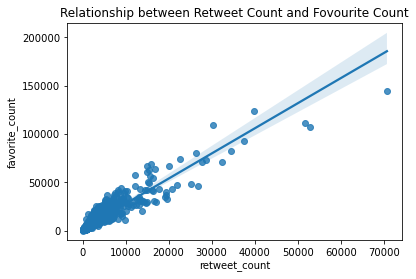

In [97]:
sns.regplot(x="retweet_count", y="favorite_count", data=df_master).set(title= 'Relationship between Retweet Count and Fovourite Count')

#### This sctterplot above confirms a strong correlation between retweet_count' vs 'favorite_count

Twitter for iPhone     1940
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64


Text(0.5, 1.0, 'The Distribution of Source')

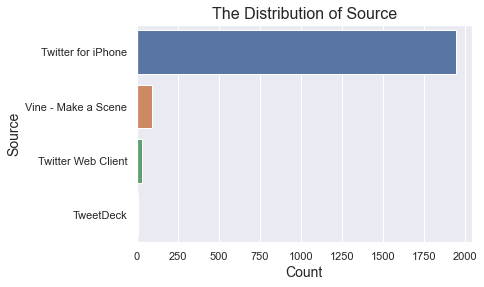

In [98]:
sorted_source = df_master['source'].value_counts().index
print(df_master['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = df_master, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)

#### We can see from the pivot table able that jigzaw puzzle has the highest prediction amongst the dog breeds with confidence level of 1.0.

Text(0.5, 1.0, 'The Distribution of Dog Stages')

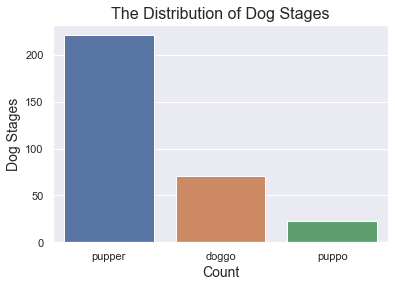

In [99]:
sorted_stage = df_master['stage'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = df_master, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)